In [412]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/users/taehyun/Dropbox/Springboard/Projects/airport-codes/datas/airport-codes.csv')
df.head()

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates
0,00A,heliport,Total Rf Heliport,11.0,NaN,US,US-PA,Bensalem,00A,NaN,00A,"-74.93360137939453, 40.07080078125"
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NaN,US,US-KS,Leoti,00AA,NaN,00AA,"-101.473911, 38.704022"
2,00AK,small_airport,Lowell Field,450.0,NaN,US,US-AK,Anchor Point,00AK,NaN,00AK,"-151.695999146, 59.94919968"
3,00AL,small_airport,Epps Airpark,820.0,NaN,US,US-AL,Harvest,00AL,NaN,00AL,"-86.77030181884766, 34.86479949951172"
4,00AR,closed,Newport Hospital & Clinic Heliport,237.0,NaN,US,US-AR,Newport,NaN,NaN,NaN,"-91.254898, 35.6087"


In [413]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57421 entries, 0 to 57420
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ident         57421 non-null  object 
 1   type          57421 non-null  object 
 2   name          57421 non-null  object 
 3   elevation_ft  49608 non-null  float64
 4   continent     28978 non-null  object 
 5   iso_country   57175 non-null  object 
 6   iso_region    57421 non-null  object 
 7   municipality  51527 non-null  object 
 8   gps_code      41561 non-null  object 
 9   iata_code     9225 non-null   object 
 10  local_code    30030 non-null  object 
 11  coordinates   57421 non-null  object 
dtypes: float64(1), object(11)
memory usage: 5.3+ MB


In [414]:
df['type'].value_counts()

small_airport     34808
heliport          12028
medium_airport     4537
closed             4378
seaplane_base      1030
large_airport       616
balloonport          24
Name: type, dtype: int64

Since there's not much data it would be better to over sample it later in the preprocess stage

In [415]:
df.isnull().sum()

ident               0
type                0
name                0
elevation_ft     7813
continent       28443
iso_country       246
iso_region          0
municipality     5894
gps_code        15860
iata_code       48196
local_code      27391
coordinates         0
dtype: int64

# Data Wrangling

In [416]:
df[['ISO_Country','ISO_state']] = df['iso_region'].str.split('-',n=1, expand=True)

Since we made a new column for iso_region, we can dop these columns

In [417]:
df.drop(['iso_country','iso_region'], axis= 1, inplace=True)

In [418]:
df.head()

,ident,type,name,elevation_ft,continent,municipality,gps_code,iata_code,local_code,coordinates,ISO_Country,ISO_state
0,00A,heliport,Total Rf Heliport,11.0,NaN,Bensalem,00A,NaN,00A,"-74.93360137939453, 40.07080078125",US,PA
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NaN,Leoti,00AA,NaN,00AA,"-101.473911, 38.704022",US,KS
2,00AK,small_airport,Lowell Field,450.0,NaN,Anchor Point,00AK,NaN,00AK,"-151.695999146, 59.94919968",US,AK
3,00AL,small_airport,Epps Airpark,820.0,NaN,Harvest,00AL,NaN,00AL,"-86.77030181884766, 34.86479949951172",US,AL
4,00AR,closed,Newport Hospital & Clinic Heliport,237.0,NaN,Newport,NaN,NaN,NaN,"-91.254898, 35.6087",US,AR


we would have to do the same for coordination

In [419]:
def split_clean_coordinate(long,lang,co):
    df[[long,lang]] = df[co].str.split(',',n=1,expand=True)
    df.drop([co],axis=1,inplace=True)
    df[long] = df[long].astype(float)
    df[lang] = df[lang].astype(float)

In [420]:
split_clean_coordinate('Longitude','Latitude','coordinates')

Now that I changes Longitude and Latitude we can do further analysis by using correlation in the EDA section

In [421]:
df.isnull().sum()

ident               0
type                0
name                0
elevation_ft     7813
continent       28443
municipality     5894
gps_code        15860
iata_code       48196
local_code      27391
ISO_Country         0
ISO_state           0
Longitude           0
Latitude            0
dtype: int64

In [422]:
duplicateRowsDF = df[df.duplicated()]
len(duplicateRowsDF)

0

In [423]:
df.rename(columns = {'ISO_Country': 'Country' ,'ISO_state':'State'}, inplace =True)

Since we already have coordinates and the state names, we dont need iata code which is the location identification code.

In [424]:
df.drop(['iata_code'], axis = 1, inplace=True)

In [425]:
df.head()

,ident,type,name,elevation_ft,continent,municipality,gps_code,local_code,Country,State,Longitude,Latitude
0,00A,heliport,Total Rf Heliport,11.0,NaN,Bensalem,00A,00A,US,PA,-74.933601,40.070801
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NaN,Leoti,00AA,00AA,US,KS,-101.473911,38.704022
2,00AK,small_airport,Lowell Field,450.0,NaN,Anchor Point,00AK,00AK,US,AK,-151.695999,59.949200
3,00AL,small_airport,Epps Airpark,820.0,NaN,Harvest,00AL,00AL,US,AL,-86.770302,34.864799
4,00AR,closed,Newport Hospital & Clinic Heliport,237.0,NaN,Newport,NaN,NaN,US,AR,-91.254898,35.608700


In [426]:
df['ident'].value_counts()

BR-0905    1
OYHD       1
DE-0112    1
CKA6       1
TMJG       1
          ..
24PN       1
DE-0427    1
AYAQ       1
RKPD       1
SVBV       1
Name: ident, Length: 57421, dtype: int64

we can see that ident is a primary key column so we can drop that as well. 

In [427]:
df.drop(['ident'], axis = 1, inplace=True)

In [428]:
df.head()

,type,name,elevation_ft,continent,municipality,gps_code,local_code,Country,State,Longitude,Latitude
0,heliport,Total Rf Heliport,11.0,NaN,Bensalem,00A,00A,US,PA,-74.933601,40.070801
1,small_airport,Aero B Ranch Airport,3435.0,NaN,Leoti,00AA,00AA,US,KS,-101.473911,38.704022
2,small_airport,Lowell Field,450.0,NaN,Anchor Point,00AK,00AK,US,AK,-151.695999,59.949200
3,small_airport,Epps Airpark,820.0,NaN,Harvest,00AL,00AL,US,AL,-86.770302,34.864799
4,closed,Newport Hospital & Clinic Heliport,237.0,NaN,Newport,NaN,NaN,US,AR,-91.254898,35.608700


lets try to fill up NA values

Let's analyze why datas are missing. 
There are three types of missing data. 
1. Missing completely at random(MCAR)
2. Missing at Random(MAR)
3. Missing Not at Random(MNAR)

<AxesSubplot:>

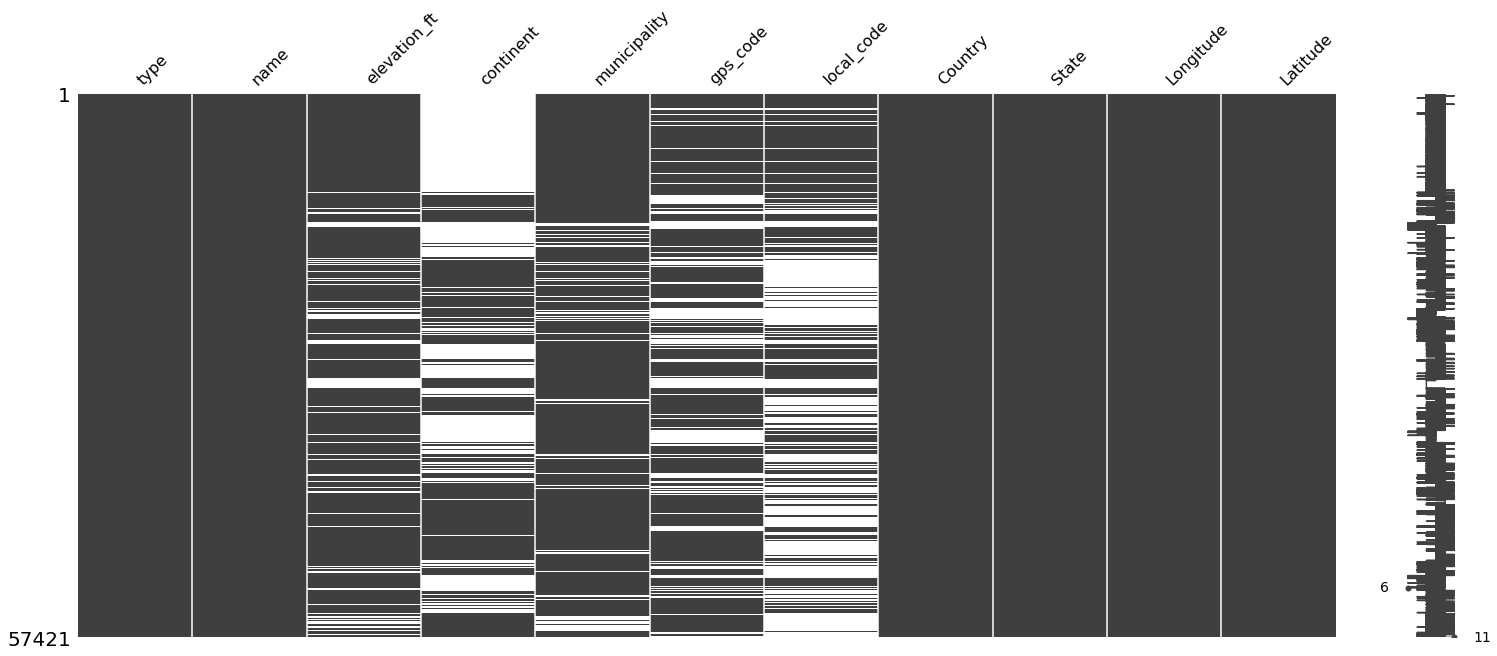

In [429]:
import missingno as msno

msno.matrix(df)

It seems like the missing values for elevation_ft, continent, municipality, gps_code, local_code, definitely aren't missing with certain patterns. They are missing in random. Let's look at more about the elevation_ft column. 

'...Projects/airport-codes/images'

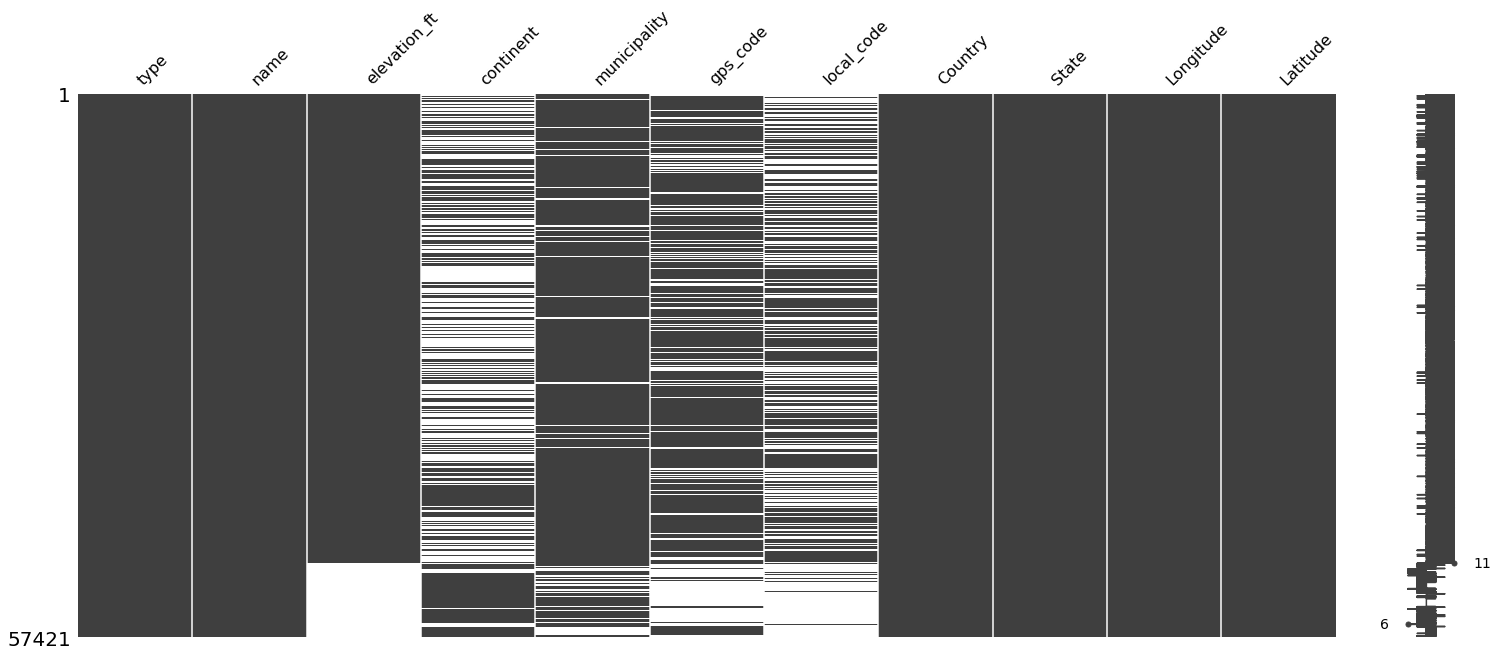

In [430]:
sorted_values = df.sort_values('elevation_ft')
msno.matrix(sorted_values)

display('...Projects/airport-codes/images')

elevation_ft is not missing by normal

Now I want to visualize how their elevation feets are like.

<AxesSubplot:xlabel='type', ylabel='elevation_ft'>

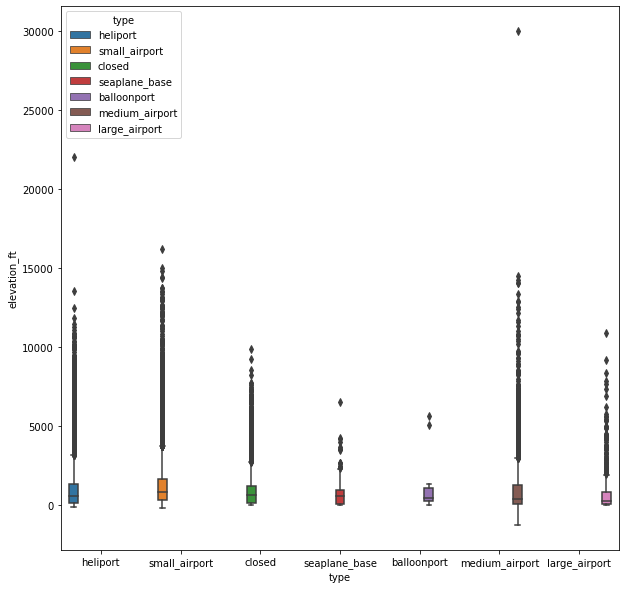

In [431]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'type', y = 'elevation_ft', data =df, hue = 'type')

In [432]:
df['type'].unique()

array(['heliport', 'small_airport', 'closed', 'seaplane_base',
       'balloonport', 'medium_airport', 'large_airport'], dtype=object)

Let's drop the value that has closed. Closed airports aren't useful for our future analysis.

In [433]:
df.drop(df[df['type'] == 'closed'].index, inplace = True)

In [434]:
data_input = ['heliport', 'small_airport', 'seaplane_base', 'medium_airport', 'large_airport']

In [435]:
def plot_mean_type(data, airport_types):
    mean_list = []
    for airport_type in airport_types:
        type_mean = np.mean(data[data['type'] == airport_type]['elevation_ft'])
        mean_list.append(type_mean)
    mean_df = pd.DataFrame({'mean_type_airport': mean_list}, index=data_input)
    return mean_df

In [436]:
mean_df_f = plot_mean_type(df, data_input)
mean_df_f

,mean_type_airport
heliport,1199.377100
small_airport,1349.811397
seaplane_base,649.716329
medium_airport,1059.199724
large_airport,798.062295


In [437]:
df['type'].value_counts()

small_airport     34808
heliport          12028
medium_airport     4537
seaplane_base      1030
large_airport       616
balloonport          24
Name: type, dtype: int64

In [438]:
mean_df_f.mean_type_airport

heliport          1199.377100
small_airport     1349.811397
seaplane_base      649.716329
medium_airport    1059.199724
large_airport      798.062295
Name: mean_type_airport, dtype: float64

<AxesSubplot:ylabel='mean_type_airport'>

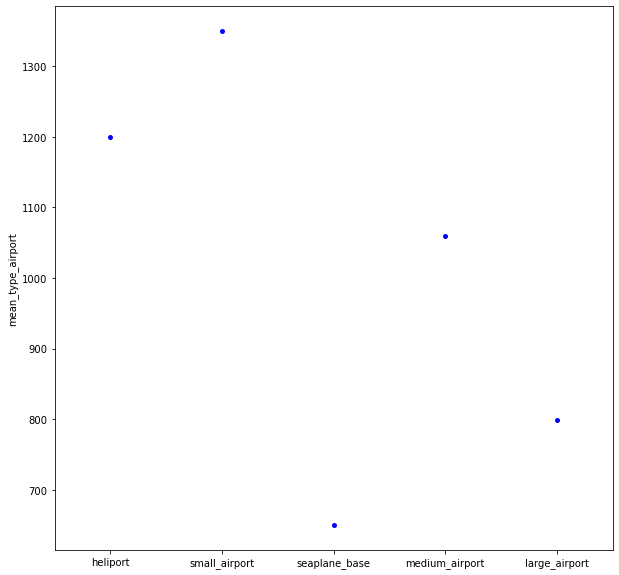

In [439]:
plt.figure(figsize=(10,10))
sns.swarmplot(x = mean_df_f.index, y = mean_df_f.mean_type_airport, data= mean_df_f, color ='b')

We can see the small airport has the most highest mean value for elevation in feet. 

The large airport and seaplane base has the smallest mean value. In further analysis, we will figure out the correlation and the deep feature analysis.

We can also identify that there are not many medium_airport, seaplane_base, large_airport, and balloonport. We can add the airports by it's similar elevation feet. We can concatenate baloonport - medium airport and seaplane-base and large airport

In [440]:
df.loc[(df['type'] == 'large_airport'), 'type'] = 'seaplane_base'

In [441]:
df.loc[(df['type'] == 'balloonport'), 'type'] = 'medium_airport'

In [442]:
df['type'].value_counts()

small_airport     34808
heliport          12028
medium_airport     4561
seaplane_base      1646
Name: type, dtype: int64

In [443]:
mean_df_f = plot_mean_type(df, data_input)
mean_df_f = mean_df_f.reset_index()
mean_df_f

,index,mean_type_airport
0,heliport,1199.377100
1,small_airport,1349.811397
2,seaplane_base,712.167012
3,medium_airport,1059.329587
4,large_airport,NaN


In [444]:
mean_df_f.columns = ['airport','mean_']
mean_df_f

,airport,mean_
0,heliport,1199.377100
1,small_airport,1349.811397
2,seaplane_base,712.167012
3,medium_airport,1059.329587
4,large_airport,NaN


In [445]:
df['elevation_ft'] = df['elevation_ft'].fillna(111)

def filling_na(type_airport, val):
    b = df['type']==type_airport
    df.loc[b,'elevation_ft'] = df.loc[b,'elevation_ft'].replace(111,val)

In [446]:
def fill_all_type(data):
    for i in range(len(data)):
        filling_na(data.airport[i], data.mean_[i])

In [447]:
fill_all_type(mean_df_f)

We fill up all the NA values with 111 first. Then we replace 111 with with the mean values for each type of airports.

We can see that the elevation feet has no more null values. Let's continue to explore more for others

<AxesSubplot:xlabel='type', ylabel='elevation_ft'>

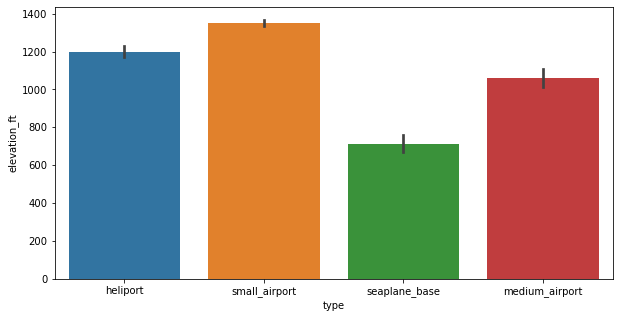

In [448]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'type', y = 'elevation_ft', data = df)

We see that small_airport has the highest elevation feet and balloonport has a huge range of confidence interval. Small_airport might have a bigger range than other airports because of it's outliers. Therefore, it's better to visualize with other types of graphs instead of a boxplot. 

But first, let's focus on filling up Na values first.

In [449]:
df['continent'].value_counts()

SA    8212
EU    7404
AS    5363
AF    3283
OC    3008
AN      26
Name: continent, dtype: int64

gps_cood and loca_code aren't really useful. We can drop these columns.

If I label encode thse in the future, there owuld be too many columns

In [450]:
df.drop(['gps_code','local_code'], axis= 1, inplace =True)

In [451]:
df.head()

,type,name,elevation_ft,continent,municipality,Country,State,Longitude,Latitude
0,heliport,Total Rf Heliport,11.0,NaN,Bensalem,US,PA,-74.933601,40.070801
1,small_airport,Aero B Ranch Airport,3435.0,NaN,Leoti,US,KS,-101.473911,38.704022
2,small_airport,Lowell Field,450.0,NaN,Anchor Point,US,AK,-151.695999,59.949200
3,small_airport,Epps Airpark,820.0,NaN,Harvest,US,AL,-86.770302,34.864799
5,small_airport,Fulton Airport,1100.0,NaN,Alex,US,OK,-97.818019,34.942803


So all the US has missing values with NaN.

In [452]:
df['continent'].fillna('A',inplace=True)

In [453]:
def fill_continent(country, continent):
    country_data = df['Country'] == country
    df.loc[country_data,'continent'] = df.loc[country_data,'continent'].replace('A', continent)

I filled up NAs with A (temporarily)

And filled up all the country matching their appropriate continent. 

In [454]:
fill_continent('US', 'NA')
fill_continent('CA', 'NA')
fill_continent('MX', 'NA')
fill_continent('CU', 'NA')
fill_continent('CR', 'NA')
fill_continent('GL', 'NA')
fill_continent('HN', 'CA')

In [455]:
df['continent'].value_counts()

NA    25148
SA     8212
EU     7404
AS     5363
AF     3283
OC     3008
A       446
CA      153
AN       26
Name: continent, dtype: int64

We changed all the A to NA - North America.

And other countries and continents as well

While I'm filling up the data I found that there's a country labeled as PA which I would have to drop this since it is a data error.

There are other countries that can be labeled into certain continents but since there's not even 100 data for each of the countries, I will drop all of them.

In [456]:
df[df['continent'] == 'A']['Country'].value_counts()

PA    69
BS    61
PR    56
GT    52
DO    34
NI    32
SV    25
BZ    24
JM    19
VI     9
HT     8
TC     8
GP     6
VC     5
VG     4
KY     3
AG     3
BQ     3
TT     3
GD     2
BB     2
LC     2
DM     2
PM     2
KN     2
MF     2
MS     1
BL     1
AW     1
MQ     1
SX     1
AI     1
CW     1
BM     1
Name: Country, dtype: int64

In [457]:
df_2 = df[df.continent != 'A']
df_2.head()

,type,name,elevation_ft,continent,municipality,Country,State,Longitude,Latitude
0,heliport,Total Rf Heliport,11.0,NA,Bensalem,US,PA,-74.933601,40.070801
1,small_airport,Aero B Ranch Airport,3435.0,NA,Leoti,US,KS,-101.473911,38.704022
2,small_airport,Lowell Field,450.0,NA,Anchor Point,US,AK,-151.695999,59.949200
3,small_airport,Epps Airpark,820.0,NA,Harvest,US,AL,-86.770302,34.864799
5,small_airport,Fulton Airport,1100.0,NA,Alex,US,OK,-97.818019,34.942803


In [458]:
#Also, for the State column, there are some Statesthat has '-' and other special characters.
#We have to get rid of this

import re
df['State'] = df['State'].apply(lambda x: re.sub('-', '', x))

<AxesSubplot:>

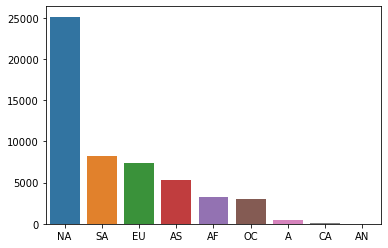

In [459]:
sns.barplot(x = df.continent.value_counts().index, y = df.continent.value_counts().values, data=df)

We have so much values for NA's. I guess most of the airports are densed in North America.

In [460]:
df.head()

,type,name,elevation_ft,continent,municipality,Country,State,Longitude,Latitude
0,heliport,Total Rf Heliport,11.0,NA,Bensalem,US,PA,-74.933601,40.070801
1,small_airport,Aero B Ranch Airport,3435.0,NA,Leoti,US,KS,-101.473911,38.704022
2,small_airport,Lowell Field,450.0,NA,Anchor Point,US,AK,-151.695999,59.949200
3,small_airport,Epps Airpark,820.0,NA,Harvest,US,AL,-86.770302,34.864799
5,small_airport,Fulton Airport,1100.0,NA,Alex,US,OK,-97.818019,34.942803


<AxesSubplot:xlabel='type', ylabel='elevation_ft'>

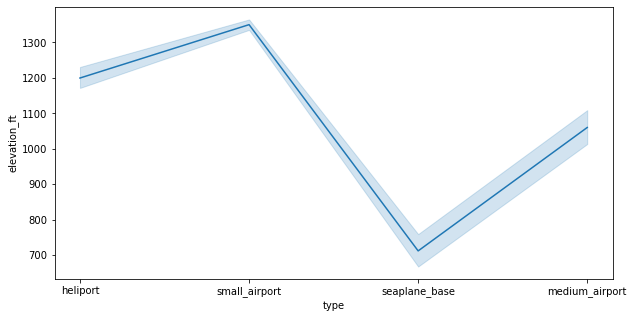

In [461]:
plt.figure(figsize=(10,5))
sns.lineplot(x= 'type' , y = 'elevation_ft', data= df)

line plot shows the relationship between elevation_ft for each type of airports. But oddly, it has a different result when I plot it with the catplot underneath.

<Figure size 1080x288 with 0 Axes>

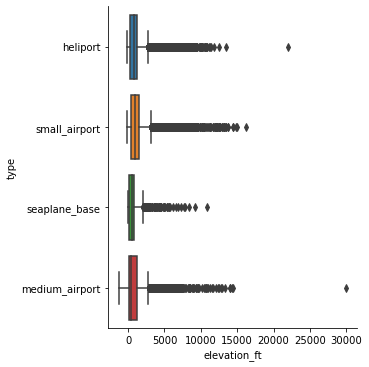

In [462]:
plt.figure(figsize=(15,4))
sns.catplot(data=df, x="elevation_ft", y="type", kind="box")

I can see outliers in this horizontal boxplot. Let's see more.

In [463]:
df[df['elevation_ft'] > 25000]

,type,name,elevation_ft,continent,municipality,Country,State,Longitude,Latitude
55049,medium_airport,Modi,29977.0,NA,California,US,CA,179.999894,89.999845


The elevation_ft 29977.0 is an outlier because according to google, 
The Leadville Airport is North America's highest public use airport at an altitude of 9,934 feet.

Hence, we don't drop this row.

I can not find anything about the elevation feet for modi airport. So I will drop this.

In [464]:
df.drop([55049], axis=0, inplace=True)

In [465]:
df[df['elevation_ft'] > 20000]

,type,name,elevation_ft,continent,municipality,Country,State,Longitude,Latitude
25164,heliport,Siachen Glacier AFS Airport,22000.0,AS,NaN,IN,JK,77.0,35.5


This isn't an outlier. It's a fact

In [466]:
df.head()

,type,name,elevation_ft,continent,municipality,Country,State,Longitude,Latitude
0,heliport,Total Rf Heliport,11.0,NA,Bensalem,US,PA,-74.933601,40.070801
1,small_airport,Aero B Ranch Airport,3435.0,NA,Leoti,US,KS,-101.473911,38.704022
2,small_airport,Lowell Field,450.0,NA,Anchor Point,US,AK,-151.695999,59.949200
3,small_airport,Epps Airpark,820.0,NA,Harvest,US,AL,-86.770302,34.864799
5,small_airport,Fulton Airport,1100.0,NA,Alex,US,OK,-97.818019,34.942803


In [467]:
def describe(data, col):
    max_v = data[col].max()
    min_v = data[col].min()
    median_v = data[col].median()
    mean_v = data[col].mean()
    return "Max: {}".format(max_v), "Min: {}".format(min_v), "Median: {}".format(median_v), "Mean: {}".format(mean_v)
    

In [468]:
describe(df,'elevation_ft')

('Max: 22000.0', 'Min: -1266.0', 'Median: 879.0', 'Mean: 1270.7861817171681')

In [469]:
below_avg = []
above_avg = []
for val in df['elevation_ft']:
    if val > 1231:
        above_avg.append(val)
    else:
        below_avg.append(val)

In [470]:
print(len(below_avg))
len(above_avg)

34376


18666

Seems like people build airports in lower elevated place than higher. Why is this?

In [471]:
df['Longitude'].astype(str).astype(float)
df['Latitude'].astype(str).astype(float)

0        40.070801
1        38.704022
2        59.949200
3        34.864799
5        34.942803
           ...    
57416    40.542524
57417    41.784401
57418    51.894444
57419   -11.584278
57420    30.784722
Name: Latitude, Length: 53042, dtype: float64

In [472]:
df.isnull().sum()

type               0
name               0
elevation_ft       0
continent          0
municipality    5237
Country            0
State              0
Longitude          0
Latitude           0
dtype: int64

Not an outlier

In [473]:
df[df['municipality'].isnull()]

,type,name,elevation_ft,continent,municipality,Country,State,Longitude,Latitude
1550,heliport,Watertown / Brownlee Heliport,1720.000000,NA,NaN,US,SD,-97.108090,44.883265
2459,heliport,Nordman / Phillabaum Heliport,2440.000000,NA,NaN,US,ID,-116.871175,48.631483
4417,seaplane_base,Peru / Destiny Cove SPB,580.000000,NA,NaN,US,ME,-70.396957,44.460597
7690,small_airport,Zadow Airstrip,1349.811397,NA,NaN,US,TX,-95.954354,29.991739
7926,small_airport,Gun Barrel City Airpark,385.000000,NA,NaN,US,TX,-96.145665,32.355150
...,...,...,...,...,...,...,...,...,...
57358,small_airport,Sengwa Research Area Airstrip,1349.811397,AF,NaN,ZW,MN,28.215618,-18.165196
57359,small_airport,Gokwe North Airport,1349.811397,AF,NaN,ZW,MI,28.330871,-17.537114
57362,small_airport,Chipinge Farm Airstrip,1349.811397,AF,NaN,ZW,MV,32.203607,-20.460575
57363,small_airport,Turwi River Airstrip,1349.811397,AF,NaN,ZW,MV,32.109040,-20.395009


In [474]:
ar_1 = df['municipality'].value_counts().values

In [475]:
z=0
for i in ar_1:
    if i == 1:
        z+= 1
z       

19741

19741 unique values are identified.

In [476]:
df.drop(['name','municipality'], axis=1, inplace = True)

There are too many unqiue values for municipality column.

In [477]:
df.head()

,type,elevation_ft,continent,Country,State,Longitude,Latitude
0,heliport,11.0,NA,US,PA,-74.933601,40.070801
1,small_airport,3435.0,NA,US,KS,-101.473911,38.704022
2,small_airport,450.0,NA,US,AK,-151.695999,59.949200
3,small_airport,820.0,NA,US,AL,-86.770302,34.864799
5,small_airport,1100.0,NA,US,OK,-97.818019,34.942803


In [478]:
df.groupby('type')['elevation_ft'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
heliport,12028.0,1199.739048,1574.350775,-117.0,200.00,808.0,1199.3771,22000.0
medium_airport,4560.0,1054.027828,1638.099686,-1266.0,85.75,433.0,1171.0000,14472.0
seaplane_base,1646.0,712.532241,965.975517,-11.0,87.25,580.5,870.7500,10860.0
small_airport,34808.0,1350.131706,1501.021729,-210.0,367.00,978.0,1478.0000,16200.0


seaplane_base and large_airport has lower elevation level

In [479]:
df.head()

,type,elevation_ft,continent,Country,State,Longitude,Latitude
0,heliport,11.0,NA,US,PA,-74.933601,40.070801
1,small_airport,3435.0,NA,US,KS,-101.473911,38.704022
2,small_airport,450.0,NA,US,AK,-151.695999,59.949200
3,small_airport,820.0,NA,US,AL,-86.770302,34.864799
5,small_airport,1100.0,NA,US,OK,-97.818019,34.942803


It seems like we got a clean data now. Let's check the outliers for elevation_ft one more time and see if we can go on to the next step

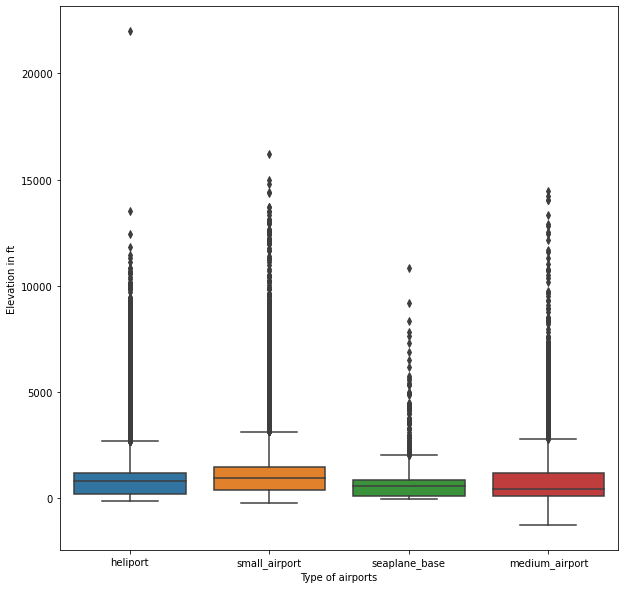

In [480]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'type', y = 'elevation_ft', data=df)
plt.xlabel('Type of airports')
plt.ylabel('Elevation in ft')
plt.show()

There are still few outliers but I identified them as true values. Not fraud

Now lets go back to the state column. We can identify numeric values for the state column and I will remove these columns. 

In [481]:
index_digit = df[df['State'].apply(lambda x: x.isdigit())].index
index_digit

Int64Index([10426, 10427, 10431, 10456, 10459, 10476, 10516, 10738, 10740,
            11561,
            ...
            57409, 57410, 57411, 57412, 57413, 57414, 57415, 57416, 57417,
            57420],
           dtype='int64', length=6167)

In [482]:
df.drop(index_digit, inplace = True)

In [483]:
df['type'].unique()

array(['heliport', 'small_airport', 'seaplane_base', 'medium_airport'],
      dtype=object)

The last thing is to balance out all the variables for the training set later

In [484]:
df['continent'].value_counts()

NA    25017
SA     8143
EU     5597
OC     2995
AS     2358
AF     2255
A       331
CA      153
AN       26
Name: continent, dtype: int64

In [485]:
new_df_country = df.Country.value_counts().to_frame()
new_df_country.Country.unique()

array([21322,  4863,  2136,  1988,  1351,   983,   938,   889,   830,
         829,   702,   591,   530,   476,   474,   468,   423,   317,
         287,   274,   261,   242,   207,   198,   193,   175,   173,
         153,   137,   128,   121,   120,   114,   112,   108,   106,
         101,    96,    94,    85,    84,    81,    80,    75,    70,
          65,    61,    60,    59,    58,    56,    55,    54,    52,
          51,    48,    44,    42,    41,    39,    37,    36,    35,
          34,    33,    32,    30,    29,    27,    26,    25,    24,
          22,    21,    20,    17,    16,    13,    12,    11,    10,
           9,     8,     7,     6,     5,     4,     3,     2,     1])

Some of the countries have such less values so we can not use these valeus to train the classification models.

We have coordinates which are divided as longitude and latitude. We also confirmed that Longitude and Latitude are only slightly negtiavely correlated. So it would be better to drop the Country for lack of information. And we dont have to drop either the Longitutude or Latitude column because of multicollinearity. Dropping the Country columns would be fine to give enough information to the customer since we have the coordinates and the continent. So Let's go ahead and drop the country column. 

In [486]:
df.drop(['Country'], axis =1, inplace = True)

In [487]:
df.drop(['State'], axis = 1, inplace = True)

The data is clean enough with good object types to go to the next step which is EDA. 

# EDA

In [488]:
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1,len(data)+1)/len(data)
    return x,y

In [489]:
def ecdf_plot_elevation_ft(data):
    plt.figure(figsize=(10,10))
    for i in range(len(mean_df_f)):
        hx,hy = ecdf(df['elevation_ft'][df.type == data.airport[i]])
        plt.plot(hx,hy,marker='.',linestyle='none')
    plt.title('ECDF plot of Elevation (ft) in heliport')
    plt.xlabel('Elevation in feat')
    plt.ylabel('% of heliport')
    plt.legend(data.airport)
    plt.margins(x=0.1)
    plt.show()

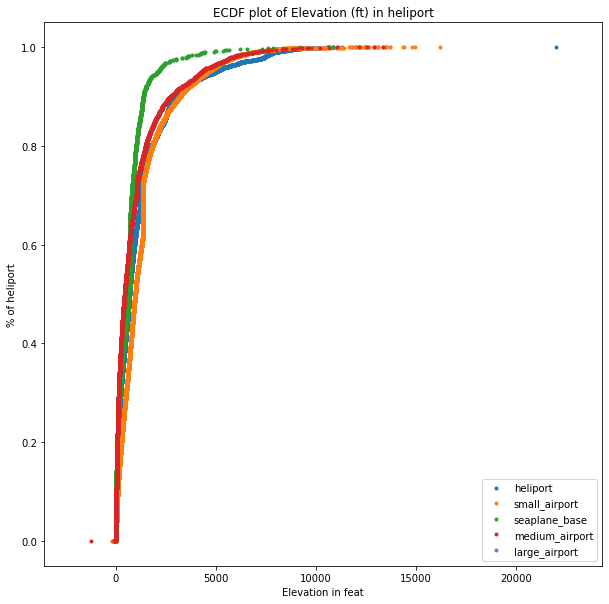

In [490]:
ecdf_plot_elevation_ft(mean_df_f)

So 85% of the airport has all the data points within the elevation feet 5000. 

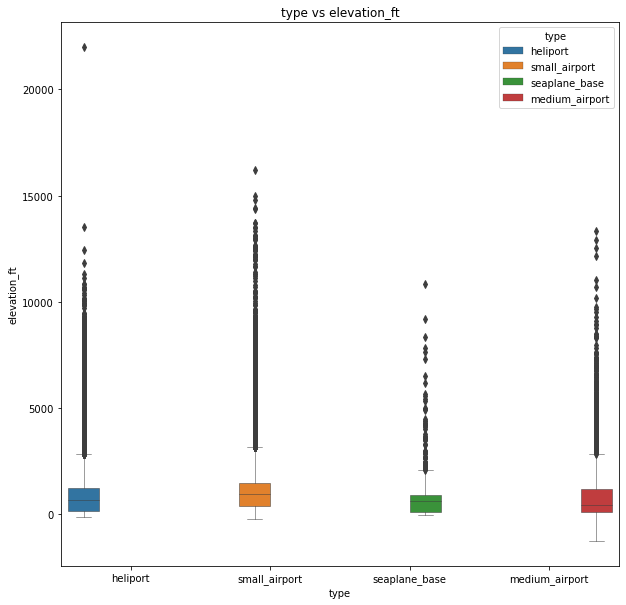

In [491]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.boxplot(x='type', y ='elevation_ft', data = df, hue ='type', width = 0.9, linewidth = 0.5)
plt.title('type vs elevation_ft')
plt.show()

How come smaller airport are built in higher elevation feet? Are heliport, seaplane_base, and balloon port considered as small or large airports?

First, I want to see what kind of airports are mostly seen in each continents. We can have multiple assumptions about this. Probably because of the weather? Or is it just because it's hard to build big airports in a higher elevation height?

Both of these assumptions makes sense bet let's dig deeper to know better

In [492]:
df.head()

,type,elevation_ft,continent,Longitude,Latitude
0,heliport,11.0,NA,-74.933601,40.070801
1,small_airport,3435.0,NA,-101.473911,38.704022
2,small_airport,450.0,NA,-151.695999,59.949200
3,small_airport,820.0,NA,-86.770302,34.864799
5,small_airport,1100.0,NA,-97.818019,34.942803


In [493]:
df.groupby(by = ['type','continent'])['continent'].count().sort_values(ascending = False)

type            continent
small_airport   NA           15651
heliport        NA            7110
small_airport   SA            6100
                EU            3923
                OC            2362
                AF            1893
heliport        SA            1622
small_airport   AS            1459
seaplane_base   NA            1146
medium_airport  NA            1110
heliport        EU             848
medium_airport  EU             692
                AS             544
                SA             398
                AF             319
                OC             307
heliport        OC             302
                AS             281
small_airport   A              187
                CA             140
seaplane_base   EU             134
medium_airport  A               88
seaplane_base   AS              74
heliport        A               40
seaplane_base   AF              35
                OC              24
                SA              23
small_airport   AN           

In [494]:
df.type.unique()

array(['heliport', 'small_airport', 'seaplane_base', 'medium_airport'],
      dtype=object)

In [495]:
#Do this for all the airport types and find the mean. and then perform the anova test.
def sample(airport):
    airport_sample = [np.random.choice(df[df['type']== airport]['elevation_ft'], 30).mean() for i in range(1000)]
    return airport_sample

In [496]:
sample_airport_df = pd.DataFrame({'heliport':sample('heliport'),'small_airport': sample('small_airport'),
                                 'seaplane_base':sample('seaplane_base'), 
                                  'medium_airport':sample('medium_airport')
})

In [497]:
sample_airport_df

,heliport,small_airport,seaplane_base,medium_airport
0,1070.658473,1198.347806,707.911134,1028.144320
1,938.025140,1282.995613,590.650035,852.388639
2,735.245903,1451.687426,642.961169,865.700000
3,1316.179237,1975.408186,625.961169,1059.744320
4,1719.725140,1193.135233,864.277801,1420.866667
...,...,...,...,...
995,2155.125140,1117.893713,650.216701,698.744320
996,1194.858473,1774.227047,559.577801,646.000000
997,1151.312570,1431.881140,515.716701,612.010986
998,1554.700000,1390.481140,756.750035,1207.077653


melt the data to make plots

In [498]:
df_melt = pd.melt(sample_airport_df, var_name='type', value_name='elevation_ft')
df_melt

,type,elevation_ft
0,heliport,1070.658473
1,heliport,938.025140
2,heliport,735.245903
3,heliport,1316.179237
4,heliport,1719.725140
...,...,...
3995,medium_airport,698.744320
3996,medium_airport,646.000000
3997,medium_airport,612.010986
3998,medium_airport,1207.077653


<Figure size 720x720 with 0 Axes>

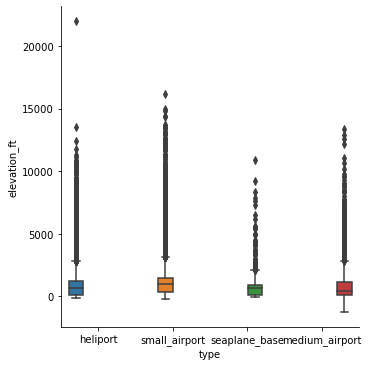

In [499]:
plt.figure(figsize=(10,10))
sns.catplot(x = 'type', y= 'elevation_ft', data = df, hue = 'type', kind = 'box')

I see that balloonport has too less data and since I sampled the data, balloon port has high elevation feet.

Now we will perform a one way ANOVA to prove the mean values have statistical difference between all groups

In [500]:
import scipy.stats as stats

In [501]:
fvalue, pvalue = stats.f_oneway(sample_airport_df['heliport'],sample_airport_df['small_airport'],
                               sample_airport_df['seaplane_base'],
                               sample_airport_df['medium_airport'])




In [502]:
fvalue, pvalue

(1104.4440254460087, 0.0)

But I want to see how each groups are statistically different from each other.

Equal sample size : Tukey's HSD
Unequal sample size: Yukey's Kramer method

In [503]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df_melt['elevation_ft'],
                          groups=df_melt['type'],
                          alpha=0.05)

#display results
print(tukey)

          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
    group1         group2      meandiff p-adj   lower     upper   reject
------------------------------------------------------------------------
      heliport medium_airport  -208.331 0.001 -237.7765 -178.8856   True
      heliport  seaplane_base -474.1636 0.001 -503.6091 -444.7182   True
      heliport  small_airport  145.7544 0.001   116.309  175.1999   True
medium_airport  seaplane_base -265.8326 0.001  -295.278 -236.3871   True
medium_airport  small_airport  354.0855 0.001    324.64  383.5309   True
 seaplane_base  small_airport   619.918 0.001  590.4726  649.3635   True
------------------------------------------------------------------------


Thus, we would conclude that there is a statistically significant difference between 
the means of all groups.



In [504]:
df.head()

,type,elevation_ft,continent,Longitude,Latitude
0,heliport,11.0,NA,-74.933601,40.070801
1,small_airport,3435.0,NA,-101.473911,38.704022
2,small_airport,450.0,NA,-151.695999,59.949200
3,small_airport,820.0,NA,-86.770302,34.864799
5,small_airport,1100.0,NA,-97.818019,34.942803


In [505]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46875 entries, 0 to 57419
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          46875 non-null  object 
 1   elevation_ft  46875 non-null  float64
 2   continent     46875 non-null  object 
 3   Longitude     46875 non-null  float64
 4   Latitude      46875 non-null  float64
dtypes: float64(3), object(2)
memory usage: 3.2+ MB


In [506]:
def correlation_numeric(type1, type2):
    col1, col2 = type1, type2
    corr = df[type1].corr(df[type2])
    print("Correlation between ", col1, " and ", col2, "is: ", round(corr, 2))

In [507]:
correlation_numeric('elevation_ft', 'Latitude')

Correlation between  elevation_ft  and  Latitude is:  -0.09


In [508]:
correlation_numeric('elevation_ft', 'Longitude')

Correlation between  elevation_ft  and  Longitude is:  -0.03


In [509]:
correlation_numeric('Longitude', 'Latitude')

Correlation between  Longitude  and  Latitude is:  -0.39


In [510]:
df_corr = round(df[['elevation_ft','Longitude','Latitude']],2).corr()
df_corr

,elevation_ft,Longitude,Latitude
elevation_ft,1.000000,-0.026343,-0.085396
Longitude,-0.026343,1.000000,-0.389576
Latitude,-0.085396,-0.389576,1.000000


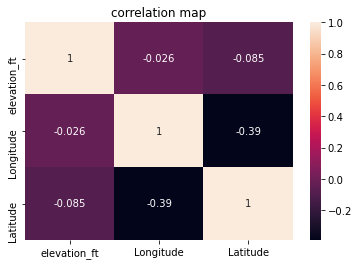

In [511]:
corr_hm = sns.heatmap(df_corr, annot = True)
corr_hm.set(title = "correlation map")

plt.show()

There are 862 unqie states and the states aren't going to help when training the model. We can exclude this column because it is highly correlated with country and also some countries don't have states.

In [512]:
df.head()

,type,elevation_ft,continent,Longitude,Latitude
0,heliport,11.0,NA,-74.933601,40.070801
1,small_airport,3435.0,NA,-101.473911,38.704022
2,small_airport,450.0,NA,-151.695999,59.949200
3,small_airport,820.0,NA,-86.770302,34.864799
5,small_airport,1100.0,NA,-97.818019,34.942803


# Preprocessing

Remove the outliers using quantiles

In [513]:
df['elevation_ft'].describe()

count    46875.000000
mean      1272.389772
std       1532.982512
min      -1266.000000
25%        280.000000
50%        850.000000
75%       1394.000000
max      22000.000000
Name: elevation_ft, dtype: float64

In [514]:
q_cutoff = df['elevation_ft'].quantile(0.95)
mask = df['elevation_ft'] < q_cutoff
trimmed_df = df[mask]
trimmed_df.shape

(44523, 5)

In [515]:
df.shape

(46875, 5)

In [516]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce

X = df.drop(['type'], axis =1 )
y = df['type']
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


# Option 1: preprocessing Binary

Binary encoding is a decent compromise for ordinal data with high cardinality.



This is just an option I can use but I won't use this. 

In [517]:
# instantiate an encoder - here we use Binary()
#It can work well with higher dimensionality ordinal data.
#ce_binary = ce.BinaryEncoder(cols = ['continent'])

# fit and transform and presto, you've got encoded data
#X = ce_binary.fit_transform(X, y)
#X

But continent isn't ordinal. It's obvious that it's a nominal categorical data.

# Option 2: hash

For nominal data a hashing algorithm with more fine-grained control usually makes more sense.

The n_components parameter controls the number of expanded columns. The default is eight columns. In our example column with three values the default results in five columns full of 0s.

If you set n_components less than k you’ll have a small reduction in the value provided by the encoded data. You’ll also have fewer dimensions.

You can pass a hashing algorithm of your choice to HashingEncoder; the default is md5. Hashing algorithms have been very successful in some Kaggle competitions. It’s worth trying HashingEncoder for nominal and ordinal data if you have high cardinality features.

But before we get right into hash encoding, let's limit our columns by merging 6 variables into 1. I named the column by naming all the continents with underscores.

# Limiting your Columns

There are way too less values for A,CA,AN. So we can make mask these as other instead of including in our encoding process.

In [518]:
counts = X.continent.value_counts()
print(counts)

NA    25017
SA     8143
EU     5597
OC     2995
AS     2358
AF     2255
A       331
CA      153
AN       26
Name: continent, dtype: int64


In [519]:
mask = X['continent'].isin(counts[counts < 3000].index)
X['continent'][mask] = 'A_CA_AN_OC_AS_AF'
print(X.continent.value_counts())

NA                  25017
SA                   8143
A_CA_AN_OC_AS_AF     8118
EU                   5597
Name: continent, dtype: int64


<ipython-input-519-03789981bf0c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['continent'][mask] = 'A_CA_AN_OC_AS_AF'


In [520]:
import category_encoders as ce

encoder = ce.HashingEncoder(cols = 'continent', n_components = 3)
X_hash = encoder.fit_transform(X['continent'])
X_hash

,col_0,col_1,col_2
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
5,0,0,1
...,...,...,...
57365,0,1,0
57366,0,1,0
57369,0,1,0
57418,0,0,1


In [521]:
new_df = pd.concat([X_hash,X], axis = 1)

In [522]:
X = new_df.drop(['continent'], axis=1)
X

,col_0,col_1,col_2,elevation_ft,Longitude,Latitude
0,0,0,1,11.000000,-74.933601,40.070801
1,0,0,1,3435.000000,-101.473911,38.704022
2,0,0,1,450.000000,-151.695999,59.949200
3,0,0,1,820.000000,-86.770302,34.864799
5,0,0,1,1100.000000,-97.818019,34.942803
...,...,...,...,...,...,...
57365,0,1,0,1232.000000,29.174883,-15.835860
57366,0,1,0,3270.000000,27.648321,-19.280942
57369,0,1,0,1349.811397,25.979821,-18.629722
57418,0,0,1,40.000000,1.482500,51.894444


In [523]:
from sklearn.model_selection import train_test_split
X_train, X_vem, y_train, y_vem = train_test_split(X,y, train_size = 0.8, random_state=42)

In [524]:
from sklearn.model_selection import train_test_split
test_size = 0.5
X_val, X_test, y_val, y_test = train_test_split(X_vem, y_vem , test_size = 0.5, random_state =42)

In [525]:
print(X_train.shape), print(y_train.shape)
print(X_val.shape), print(y_val.shape)
print(X_test.shape), print(y_test.shape)

(37500, 6)
(37500,)
(4687, 6)
(4687,)
(4688, 6)
(4688,)


(None, None)

In [526]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train[['elevation_ft','Longitude','Latitude']]= ss.fit_transform(X_train[['elevation_ft','Longitude','Latitude']])
X_val[['elevation_ft','Longitude','Latitude']] = ss.fit_transform(X_val[['elevation_ft','Longitude','Latitude']])
X_test[['elevation_ft','Longitude','Latitude']] = ss.transform(X_test[['elevation_ft','Longitude','Latitude']])


<ipython-input-526-2b98f0792237>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['elevation_ft','Longitude','Latitude']]= ss.fit_transform(X_train[['elevation_ft','Longitude','Latitude']])
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-526-2b98f0792237>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

# Modeling

In [550]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model_params = {
    'LogisticRegression': {
        'model': LogisticRegression(solver = 'liblinear', multi_class = 'auto'),
        'params' : {
            'C' : [1,5,10]
        }
    },
    'SGDClassifier': {
        'model': SGDClassifier(),
        'params' : {
            'penalty': ['None']
        }
    },
    'svm': {
        'model': svm.SVC(gamma = 'auto'),
        'params': {
            'C': [1,1.2,1.4,1.5,1.6,4,5,6,7,10],
            'kernel':['rbf','linear']
        }
    },
    'Decision_Tree': {
        'model':DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini']
        }
    }
}

In [ ]:
scores = []
for model_name, param in model_params.items():
    dlf = GridSearchCV(param['model'], param['params'], cv =5, return_train_score = False)
    dlf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': dlf.best_score_,
        'best_params': dlf.best_params_
    })

In [ ]:
df_model = pd.DataFrame(scores, columns = ['model', 'best_score','best_params'])
df_model

I will perform Random forest seperately  because it takes way too much time to compute. 

In [ ]:
def randomforest(model):    
    rf = model()
    params =['n_estimators' : [x for x in range(0,200,50)],
                'oob_score' : [True,False],
                'max_depth' : [x for x in range(0,15,1)]]
    gr = GridSearchCV()
    gr.fit(rf, params = params)

In [ ]:
# best model
RandomForestClassifier

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_fscore_support as score

cm = confusion_matrix(y_pred,y_test)
cm

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_pred, y_test))

# So if i just do argmax(axis=1) after one hot encoding, it would be the same as labelencoder..

AdaBoost and Gradient Boost

In [540]:
from sklearn.ensemble import AdaBoostClassifier

def get_scores_for_models(instance):    
    accuracy_scores = []
    training_scores = []
    validation_scores = []
    testing_scores = []

    for n in range(1,202,50):
        model = instance(n_estimators=n, random_state = 0)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        training_scores.append(model.score(X_train,y_train))
        validation_scores.append(model.score(X_val, y_val))
        testing_scores.append(model.score(X_test,y_test))
        df = pd.DataFrame({'Accruacy Scores':accuracy_scores, 'Training Scores':training_scores, 'Validation Scores': validation_scores, 'Testing Scores':testing_scores})
    
    return df


In [541]:
get_scores_for_models(AdaBoostClassifier)

,Accruacy Scores,Training Scores,Validation Scores,Testing Scores
0,0.675341,0.678213,0.669511,0.675341
1,0.672142,0.694213,0.663537,0.672142
2,0.671288,0.699973,0.663111,0.671288
3,0.676195,0.702773,0.671005,0.676195
4,0.680034,0.706560,0.678472,0.680034


In [542]:
get_scores_for_models(GradientBoostingClassifier)

,Accruacy Scores,Training Scores,Validation Scores,Testing Scores
0,0.675341,0.678213,0.669511,0.675341
1,0.695606,0.734933,0.696821,0.695606
2,0.700085,0.745200,0.699595,0.700085
3,0.699232,0.752960,0.698955,0.699232
4,0.700725,0.757947,0.698101,0.700725


In [ ]:
'''y_pred = gb_model.predict(X_test)
    precision,recall,fscore,support = score(y_test, y_pred)
    print('Est:{} / Depth:{} / LR : {} ---- Precision : {} / Recall : {} / Accuracy : {}'.format(
        est, max_depth, lr, precision, recall, 
        ((y_pred == y_test).sum() / len(y_pred))'''

In [544]:
gb = GradientBoostingClassifier()

param = {
    'n_estimator': [100,150],
    'max_depth': [7,11,15],
    'learning_rate': [0.1]
}

clf = GridSearchCV(gb, param_grid = param, cv= 5, n_jobs = -1)
cv_fit = clf.fit(X_train, y_train)
pd.DataFrame(cv_fit.cv_results_).sort_values('mean_test_score', ascending= False)[0:5]

ValueError: Invalid parameter n_estimator for estimator GradientBoostingClassifier(max_depth=7). Check the list of available parameters with `estimator.get_params().keys()`.

Gradient boosting with XGBoost

- Optimized gradient-boosting machine learning library
- irginially written in C++
- spped and performance
- core algorithm is parallelizable
- consistently outperforms single algorithm methods

I have to encode y value because XGBoost doesn't accept categorical values.

First, I want to use is without producing Dmatrix to see the necessity of Dmatrix

In [ ]:
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

Reshape the array to 1d array.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y_train_encoded = ohe.fit_transform(y_train).toarray()
y_test_encoded = ohe.transform(y_test).toarray()

In [ ]:
y_train = y_train_encoded.argmax(axis=1)
y_test = y_test_encoded.argmax(axis=1)

change the y_train, y_test to 1d array for the input to the XGboost

In [ ]:
xg_cl = xgb.XGBClassifier(objective = 'multi:softmax', num_class = 4)
xg_cl.fit(X_train,y_train)

In [ ]:
preds = xg_cl.predict(X_test)
accuracy = float(np.sum(preds == y_test)) / y_test.shape[0]
print("accuracy: %f" % (accuracy))

USING Dmatrix and compare the accuracy score

In [ ]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [ ]:
params = {'max_depth':3,
          'eta':0.1,
         'objective':'multi:softmax',
          'num_class' : 4,
          'metrics': "error", 
          'as_pandas':True, 
          'seed':123
         }

num_rounds=400

Cross validation

In [ ]:
cv_results = xgb.cv(params=params, dtrain=dtrain, metrics="auc")
cv_results

In [ ]:
# Print cv_results
print(cv_results)
print('test-auc-mean: {}'.format(cv_results["test-auc-mean"].iloc[-1]))

Fantastic! An AUC of 0.748 is quite strong. As you have seen, XGBoost's learning API makes it very easy to compute any metric you may be interested in. In Chapter 3, you'll learn about techniques to fine-tune your XGBoost models to improve their performance even further. For now, it's time to learn a little about exactly when to use XGBoost.

# Training the XGBoost model

In [ ]:
w_list = [(dtrain,'train'),(dtest,'test')]
xgb_ml = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds,\
                  early_stopping_rounds=100, evals=w_list)

In [ ]:
pred_probs = xgb_ml.predict(dtest)
#Switch to int from float
pred_probs = pred_probs.astype(int)
y_test = y_test.astype(int)

In [ ]:
accuracy = float(np.sum(pred_probs == y_test)) / y_test.shape[0]
print("accuracy: %f" % (accuracy))

There is a 0.03% improvement comparing to the model that did not use Dmatrix

# Plot the feature importance

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9,10))
plot_importance(xgb_ml, ax=ax)